# **Imports**

In [1]:
import os
import numpy as np
import pandas as pd

# **Paths & Global Variables**

In [2]:
ROOT_PATH = r"C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic"

import sys

sys.path.append(ROOT_PATH)

from titanic.config import INTERIM_DATA_DIR, FIGURES_DIR
from titanic.eda.univariate_plots import plot_histogram, plot_boxplot, plot_barchart
from titanic.eda.multivariate_plots import (
    plot_multivar_boxplot,
    plot_bivar_histogram,
    plot_bivar_barchart,
    plot_multivar_scatterplot,
    plot_pairplot,
    plot_heatmap,
)

2025-03-21 17:47:20.211 | INFO     | titanic.config:<module>:9 - PROJ_ROOT path is: C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic


# **Reading Data**

In [3]:
os.chdir(INTERIM_DATA_DIR)
clean_df = pd.read_parquet("cleaned.parquet")
clean_df.head(1)

,siblings_spouses,parents_children,num_rooms,age,fare,survived,passenger_class,sex,embarked,cabin_level_1,full_name,ticket,cabin,surname,title,first_name,cabin_level_2,split
passenger_id,,,,,,,,,,,,,,,,,,
1,1,0,0,22.0,7.25,False,Lower,male,S,G,"Braund, Mr. Owen Harris",A/5 21171,Unknown,Braund,Mr,Owen Harris,0,train


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 1 to 1309
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   siblings_spouses  1307 non-null   int64   
 1   parents_children  1307 non-null   int64   
 2   num_rooms         1307 non-null   int64   
 3   age               1307 non-null   float64 
 4   fare              1307 non-null   float64 
 5   survived          1307 non-null   bool    
 6   passenger_class   1307 non-null   category
 7   sex               1307 non-null   category
 8   embarked          1307 non-null   category
 9   cabin_level_1     1307 non-null   category
 10  full_name         1307 non-null   string  
 11  ticket            1307 non-null   string  
 12  cabin             1307 non-null   string  
 13  surname           1307 non-null   string  
 14  title             1307 non-null   string  
 15  first_name        1307 non-null   string  
 16  cabin_level_2     1307 non-nu

# **Descriptive Analytics**

## **Descriptive Statistics**

In [5]:
clean_df.describe(include=[np.number])

,siblings_spouses,parents_children,num_rooms,age,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.499617,0.385616,0.270849,29.375782,33.208594
std,1.042273,0.866092,0.573882,13.171475,51.749144
min,0.000000,0.000000,0.000000,0.170000,0.000000
25%,0.000000,0.000000,0.000000,22.000000,7.895800
50%,0.000000,0.000000,0.000000,26.738095,14.454200
75%,1.000000,0.000000,0.000000,36.000000,31.275000
max,8.000000,9.000000,4.000000,80.000000,512.329200


In [6]:
# Binary and OHE variables
clean_df.describe(include=[np.bool])

,survived
count,1307
unique,2
top,False
freq,967


In [7]:
clean_df["survived"].value_counts()

survived
False    967
True     340
Name: count, dtype: int64

In [8]:
clean_df["survived"].value_counts(normalize=True)

survived
False    0.739862
True     0.260138
Name: proportion, dtype: float64

In [9]:
# Ordinal variables
clean_df.describe(include=["category"])

,passenger_class,sex,embarked,cabin_level_1
count,1307,1307,1307,1307
unique,3,2,3,7
top,Lower,male,S,G
freq,709,843,914,488


In [10]:
clean_df.passenger_class.value_counts(normalize=True)

passenger_class
Lower     0.542464
Upper     0.245601
Middle    0.211936
Name: proportion, dtype: float64

In [11]:
clean_df.embarked.value_counts(normalize=True)

embarked
S    0.699311
C    0.206580
Q    0.094109
Name: proportion, dtype: float64

In [12]:
clean_df.sex.value_counts(normalize=True)

sex
male      0.644989
female    0.355011
Name: proportion, dtype: float64

In [13]:
clean_df.cabin_level_1.value_counts(normalize=True)

cabin_level_1
G    0.373374
F    0.348125
C    0.123948
D    0.053558
B    0.048202
E    0.035960
A    0.016832
Name: proportion, dtype: float64

In [14]:
# Nominal variables
clean_df.describe(include=["string"])

,full_name,ticket,cabin,surname,title,first_name,cabin_level_2
count,1307,1307,1307,1307,1307,1307,1307
unique,1305,928,186,873,18,1124,105
top,"Kelly, Mr. James",CA. 2343,Unknown,Sage,Mr,John,0
freq,2,11,1014,11,757,15,1020


## **Data Visualisation**

In [15]:
os.chdir(FIGURES_DIR)

### **Continuous Variables**

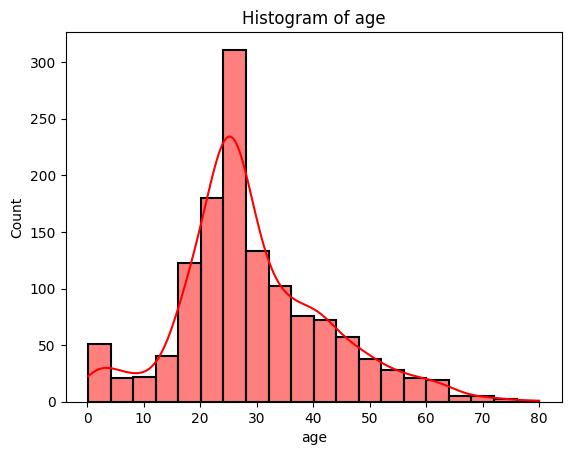

In [16]:
plot_histogram(clean_df, "age", 20)

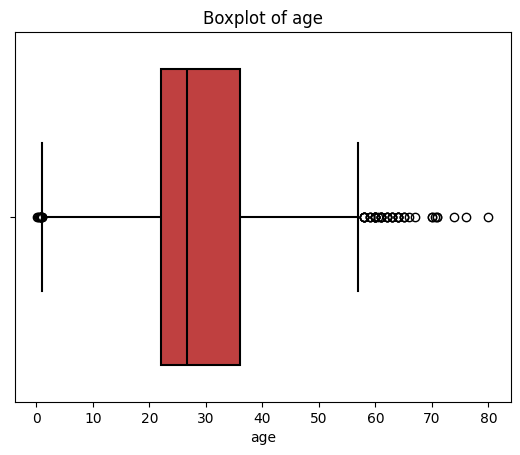

In [17]:
plot_boxplot(clean_df, "age")

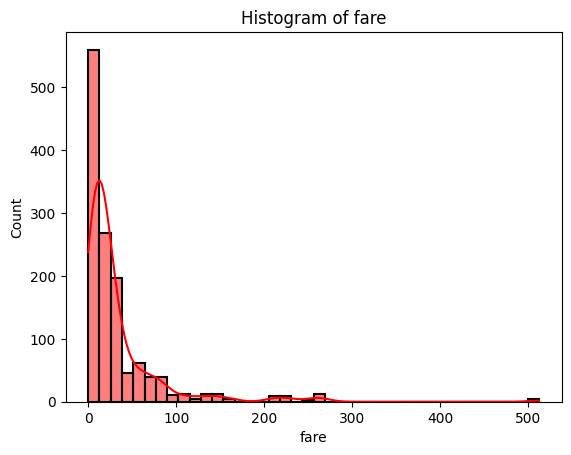

In [18]:
plot_histogram(clean_df, "fare", 40)

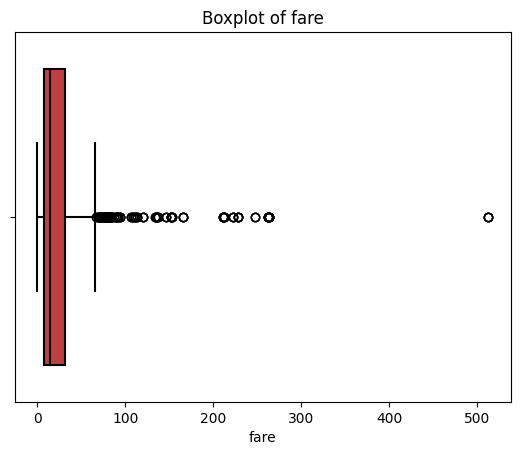

In [19]:
plot_boxplot(clean_df, "fare")

### **Discrete Variables**

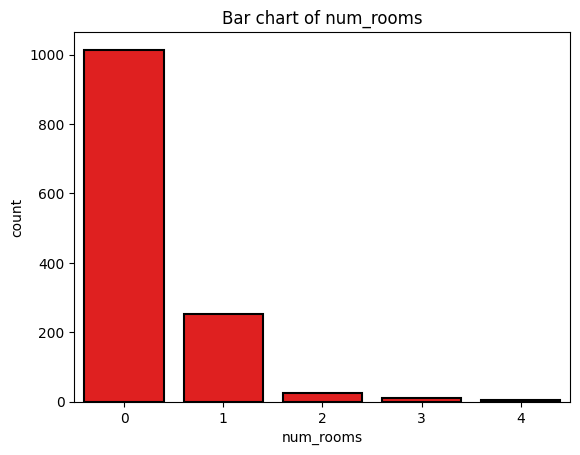

In [20]:
plot_barchart(clean_df, "num_rooms", cat_type=False)

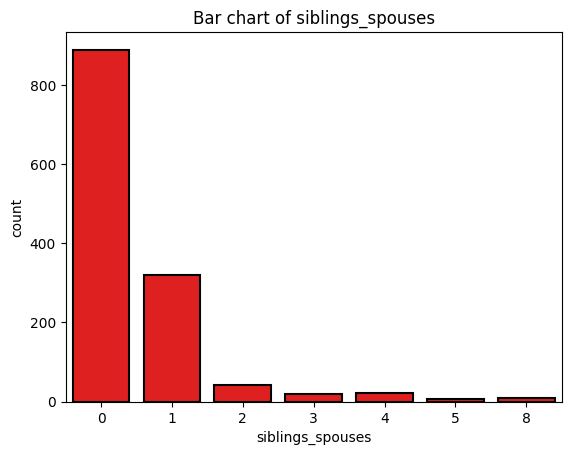

In [21]:
plot_barchart(clean_df, "siblings_spouses", cat_type=False)

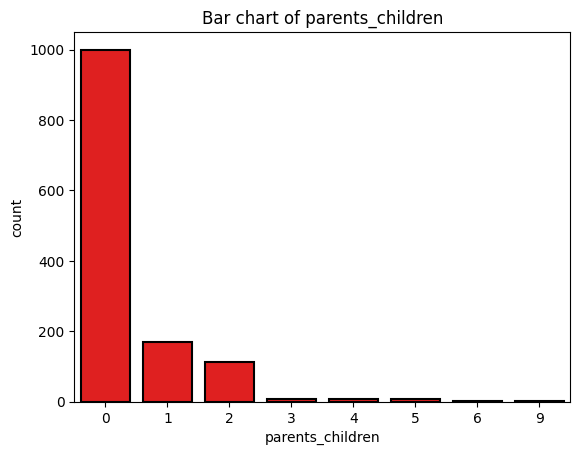

In [22]:
plot_barchart(clean_df, "parents_children", cat_type=False)

### **Binary Variables**

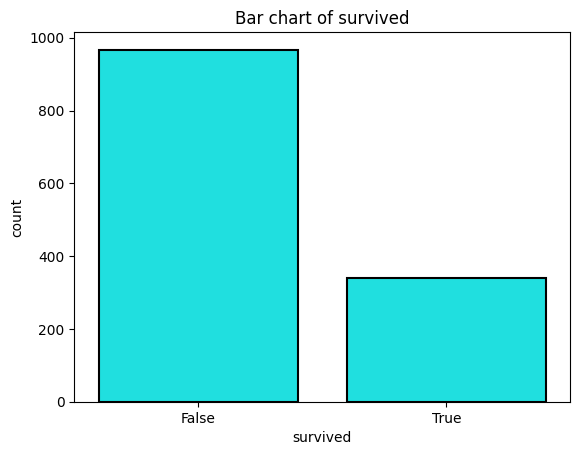

In [23]:
plot_barchart(clean_df, "survived")

### **Ordinal Variables**

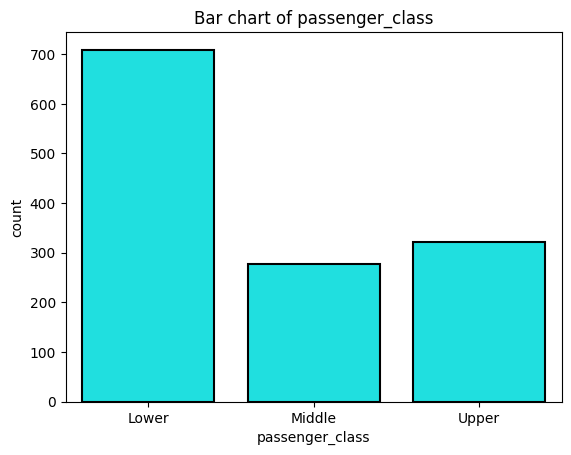

In [24]:
plot_barchart(clean_df, "passenger_class")

### **Nominal Categorical Variables**

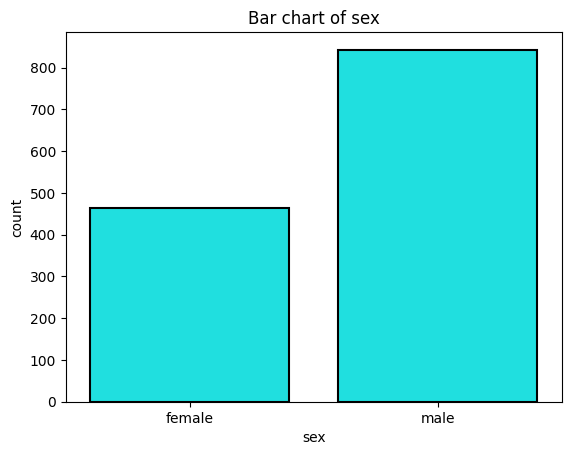

In [25]:
plot_barchart(clean_df, "sex")

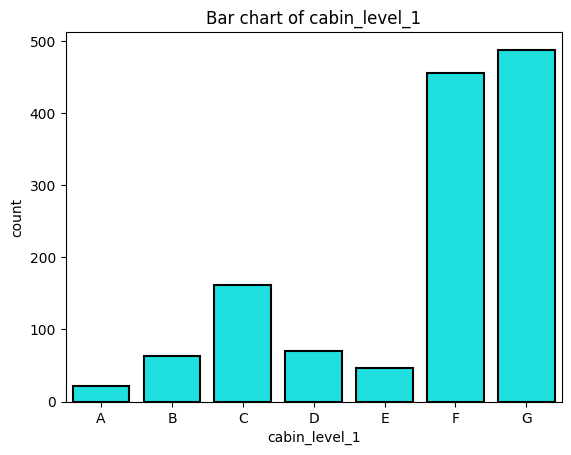

In [26]:
plot_barchart(clean_df, "cabin_level_1")

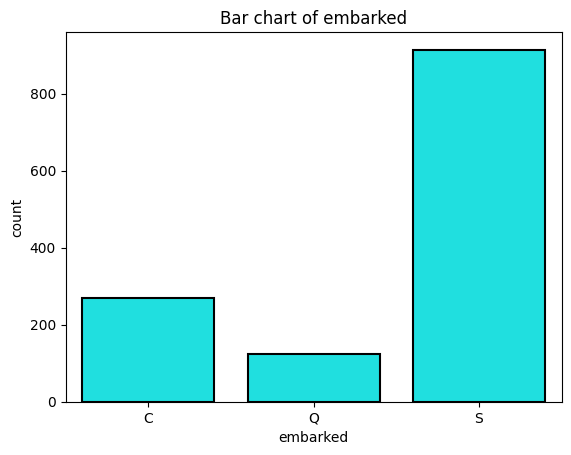

In [27]:
plot_barchart(clean_df, "embarked")

# **Diagnostic Analytics**

## **Bivariate Statistics**

### **Continouos Variable to Non-Continouos Variable**

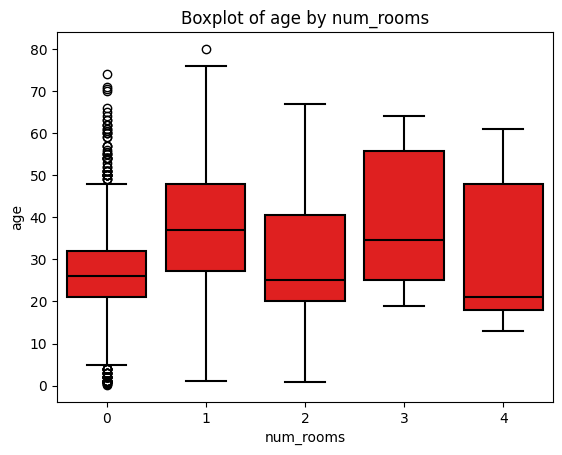

In [28]:
plot_multivar_boxplot(clean_df, "num_rooms", "age")

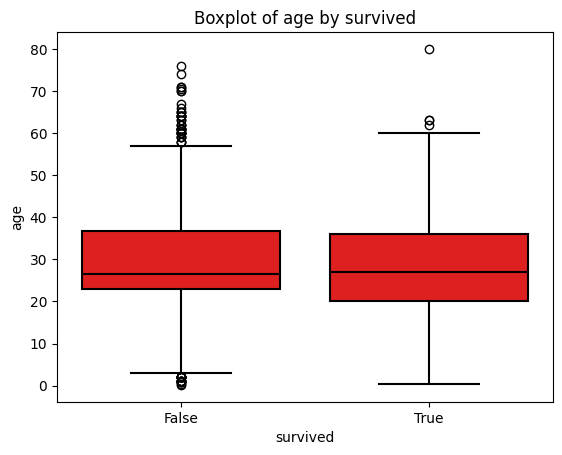

In [29]:
plot_multivar_boxplot(clean_df, "survived", "age")

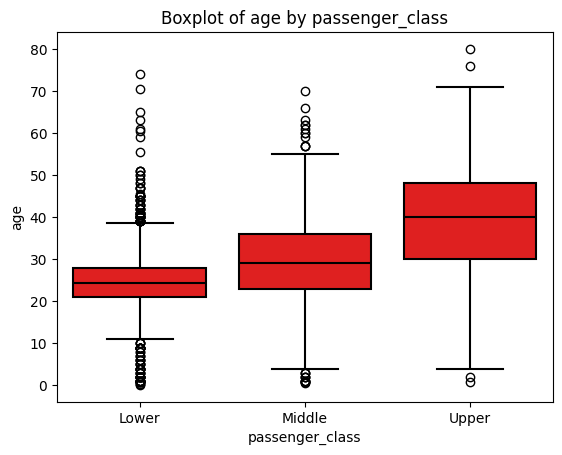

In [30]:
plot_multivar_boxplot(clean_df, "passenger_class", "age")

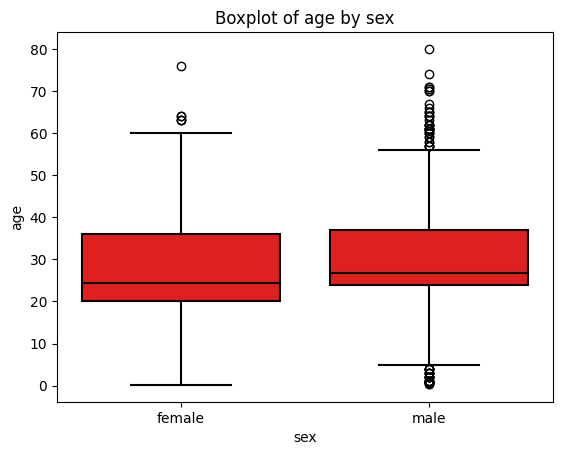

In [31]:
plot_multivar_boxplot(clean_df, "sex", "age")

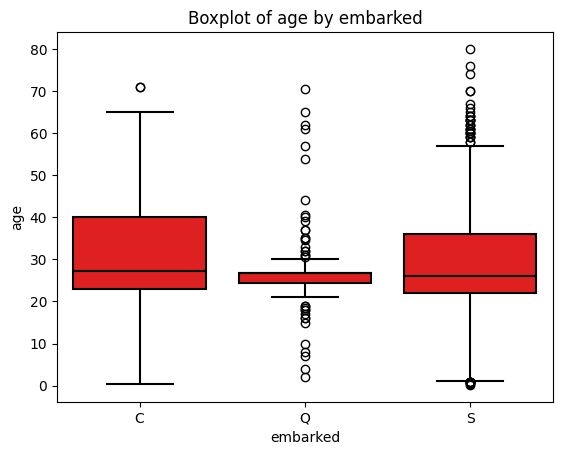

In [32]:
plot_multivar_boxplot(clean_df, "embarked", "age")

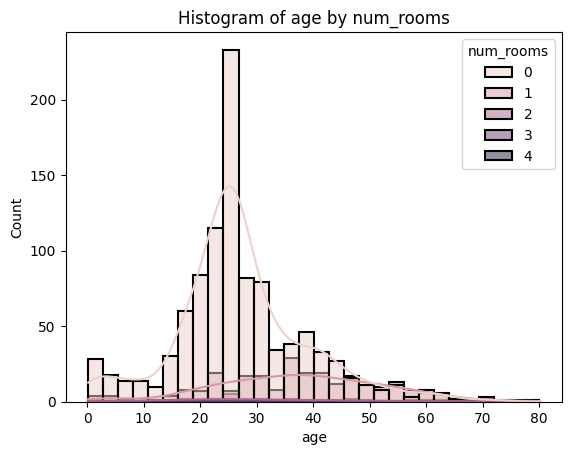

In [33]:
plot_bivar_histogram(clean_df, "num_rooms", "age")

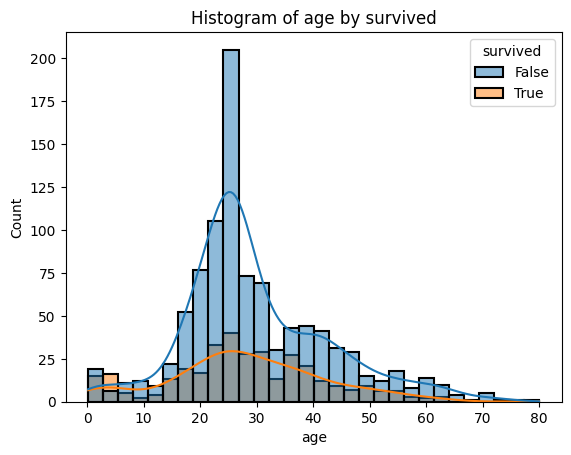

In [34]:
plot_bivar_histogram(clean_df, "survived", "age")

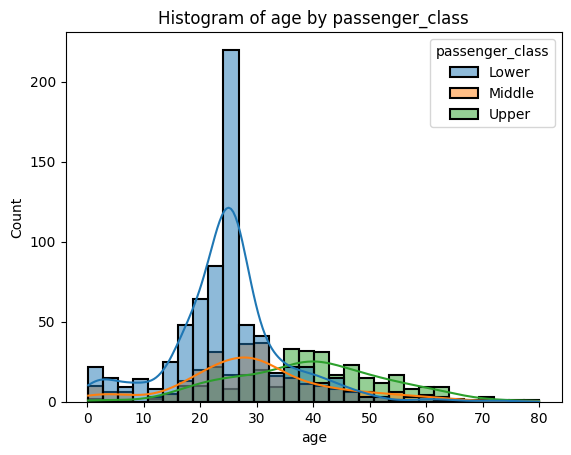

In [35]:
plot_bivar_histogram(clean_df, "passenger_class", "age")

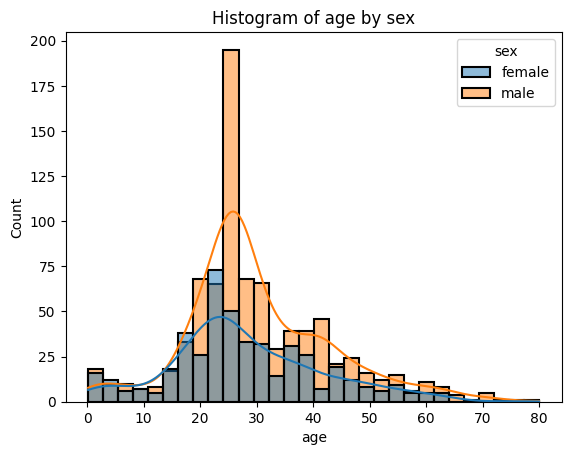

In [36]:
plot_bivar_histogram(clean_df, "sex", "age")

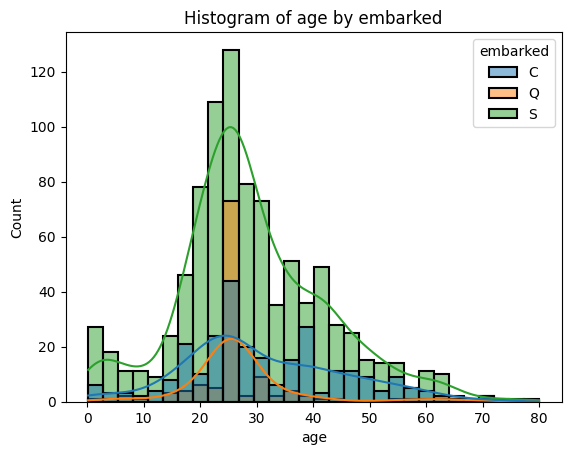

In [37]:
plot_bivar_histogram(clean_df, "embarked", "age")

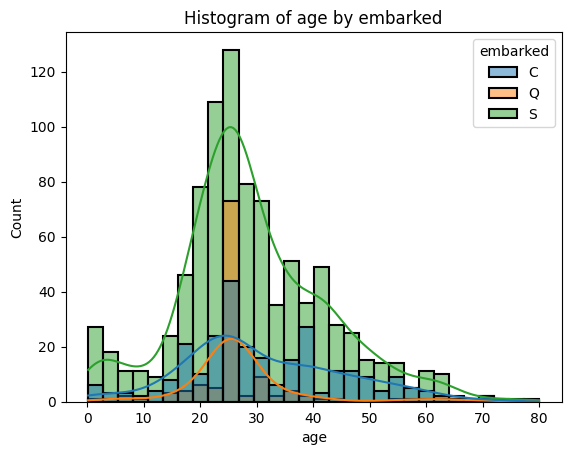

In [38]:
plot_bivar_histogram(clean_df, "embarked", "age")

### **Two Continuous Variables**

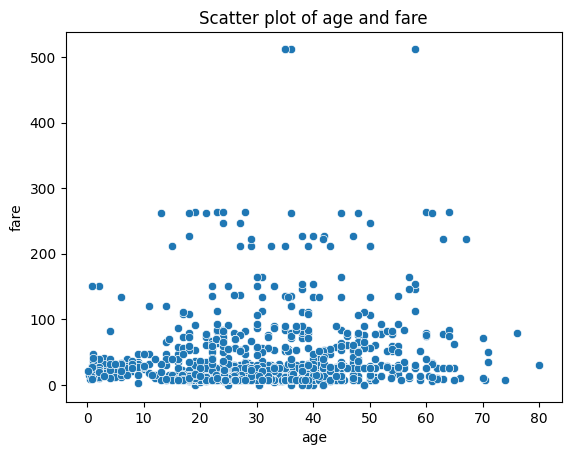

In [39]:
plot_multivar_scatterplot(clean_df, "age", "fare")

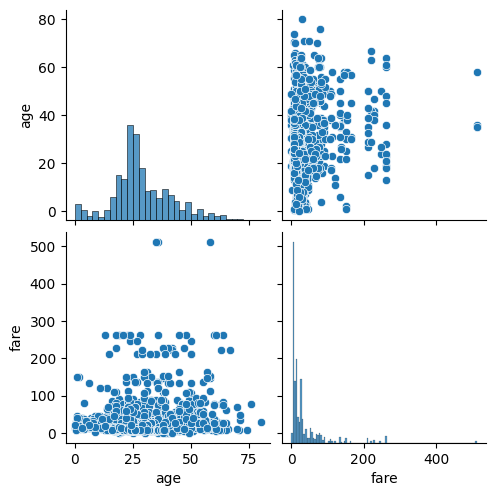

In [40]:
plot_pairplot(clean_df)

### **Two Categorical Variables**

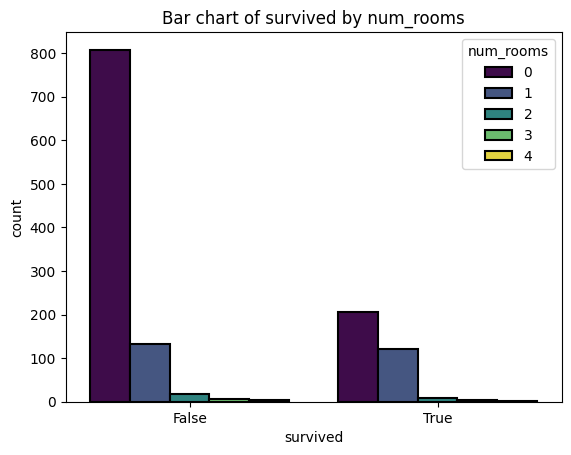

In [41]:
plot_bivar_barchart(clean_df, "survived", "num_rooms")

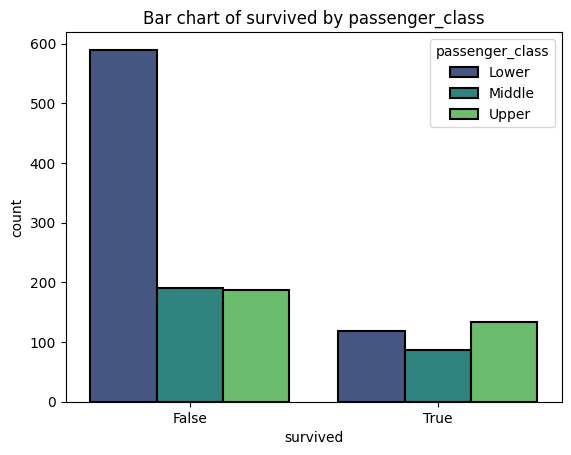

In [42]:
plot_bivar_barchart(clean_df, "survived", "passenger_class")

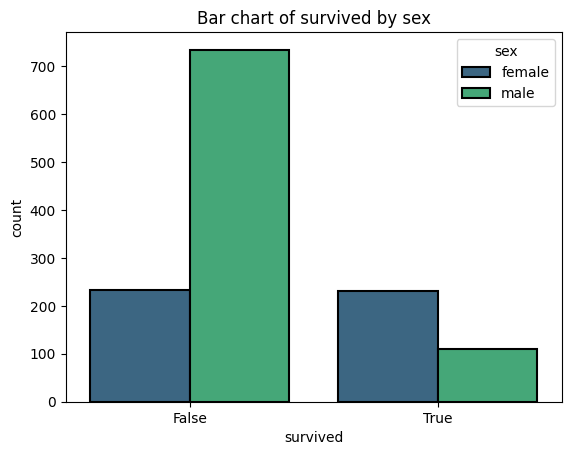

In [43]:
plot_bivar_barchart(clean_df, "survived", "sex")

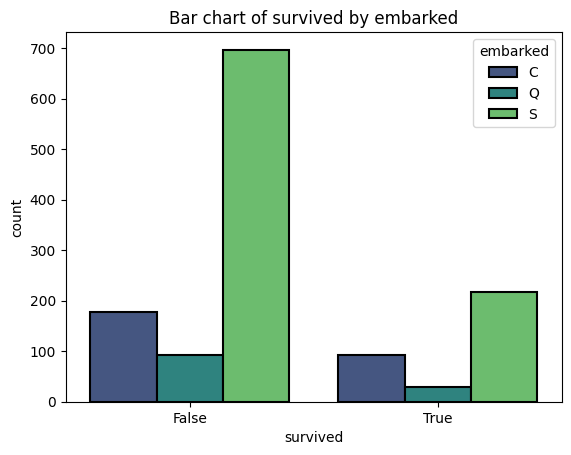

In [44]:
plot_bivar_barchart(clean_df, "survived", "embarked")

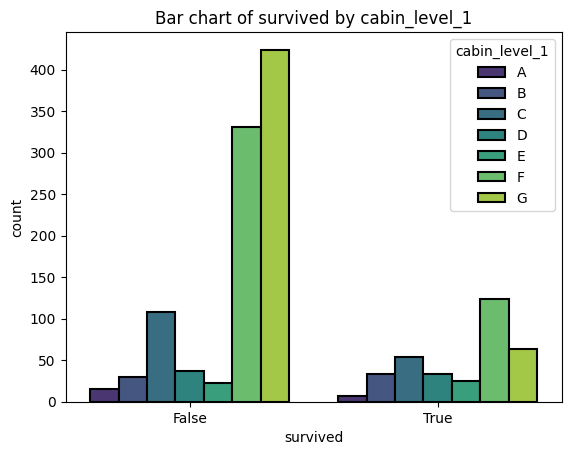

In [45]:
plot_bivar_barchart(clean_df, "survived", "cabin_level_1")

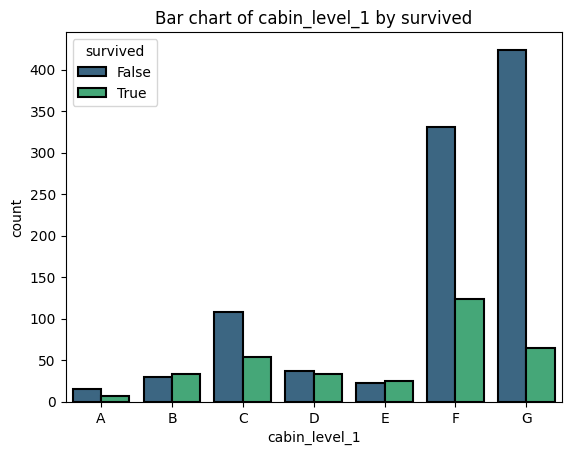

In [46]:
plot_bivar_barchart(clean_df, "cabin_level_1", "survived")

## **Multivariate Statistics**

### **Continuous Variable to Many Non Continouos Variables**

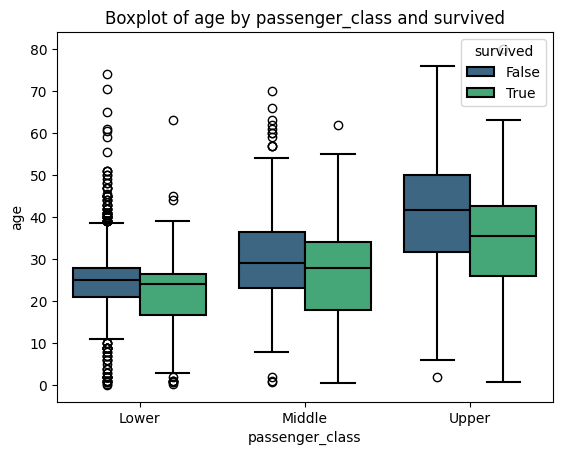

In [47]:
plot_multivar_boxplot(clean_df, "passenger_class", "age", "survived")

### **Two Continuous Variables to Categorical Variable**

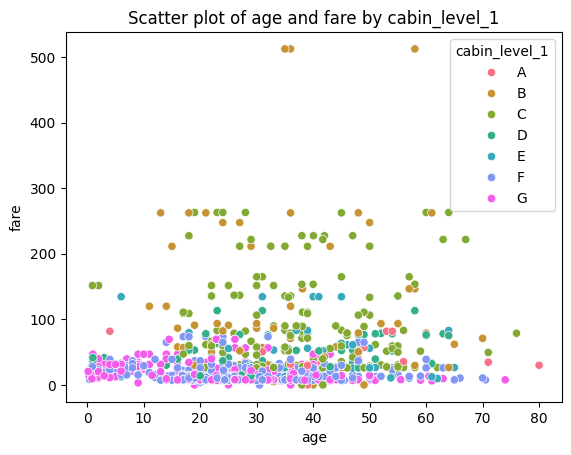

In [48]:
plot_multivar_scatterplot(clean_df, "age", "fare", "cabin_level_1")

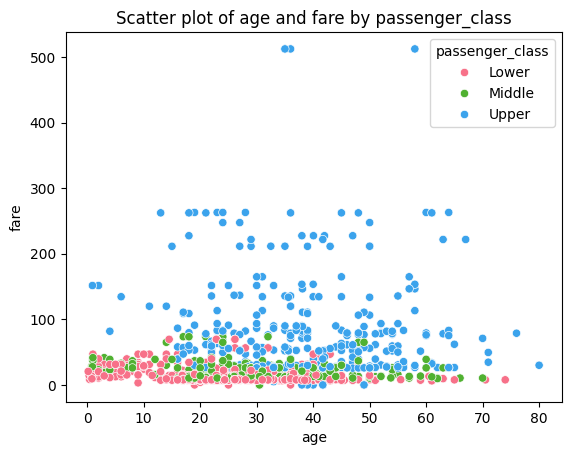

In [49]:
plot_multivar_scatterplot(clean_df, "age", "fare", "passenger_class")

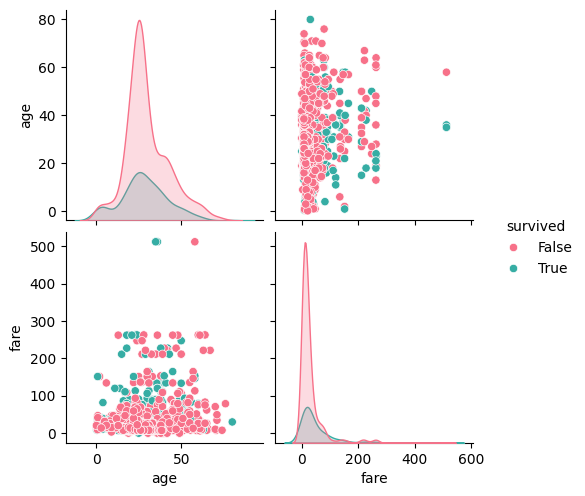

In [50]:
plot_pairplot(clean_df, "survived")

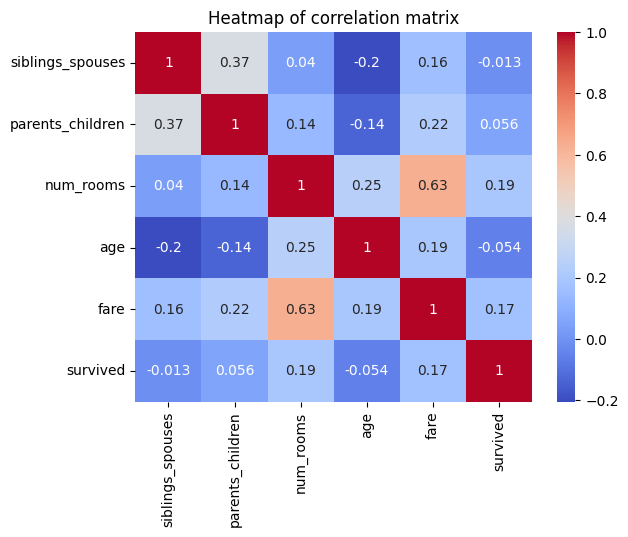

In [51]:
plot_heatmap(clean_df)